**Load the dataset and perform necessary data preprocessing.**

In [24]:
# import main data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#Since we have different algorithms, we use different sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import  mean_squared_log_error


In [2]:
#Load data.
data=pd.read_csv('/content/bike sales.csv')

In [3]:
#Checking shape of the data
data.shape
#They are 1010141 rows and 18 columns

(101041, 18)

In [4]:
#Load data and view the first five rows.
data.head(3)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0


In [13]:
#Checking the missing values in the dataset
data.isnull().sum()
#Dataset have missing values.

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        1
Product             1
Order_Quantity      1
Unit_Cost           1
Unit_Price          1
Profit              1
Cost                1
Revenue             1
dtype: int64

In [14]:
#Handling missing values.
#imputing missing values
data['Sub_Category'] = data['Sub_Category'].fillna(value = (data['Sub_Category'].mode()[0]))
data['Product'] = data['Product'].fillna(value = (data['Product'].mode()[0]))
data['Order_Quantity'] = data['Order_Quantity'].fillna(value = (data['Order_Quantity'].mean()))
data['Unit_Cost'] = data['Unit_Cost'].fillna(value = (data['Unit_Cost'].mean()))
data['Unit_Price'] = data['Unit_Price'].fillna(value = (data['Unit_Price']).mean())
data['Profit'] = data['Profit'].fillna(value = data['Profit'].mean())
data['Cost'] = data['Cost'].fillna(value = data['Cost'].mode()[0])
data['Revenue'] = data['Revenue'].fillna(value = data['Revenue'].mean())

In [15]:
#Verfying if all the missing values are filled
data.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [6]:
#Check the data types
data.dtypes

#Dataset consist of object, float64 and int64 data types.

Date                 object
Day                   int64
Month                object
Year                  int64
Customer_Age          int64
Age_Group            object
Customer_Gender      object
Country              object
State                object
Product_Category     object
Sub_Category         object
Product              object
Order_Quantity      float64
Unit_Cost           float64
Unit_Price          float64
Profit              float64
Cost                float64
Revenue             float64
dtype: object

**Explore the data to understand its features and characteristics.**

                 Day           Year   Customer_Age  Order_Quantity  \
count  101041.000000  101041.000000  101041.000000   101040.000000   
mean       15.647242    2014.383181      35.955315       12.025129   
std         8.785268       1.288513      10.999227        9.534900   
min         1.000000    2011.000000      17.000000        1.000000   
25%         8.000000    2013.000000      28.000000        2.000000   
50%        16.000000    2014.000000      35.000000       11.000000   
75%        23.000000    2016.000000      43.000000       20.000000   
max        31.000000    2016.000000      87.000000       32.000000   

           Unit_Cost     Unit_Price         Profit           Cost  \
count  101040.000000  101040.000000  101040.000000  101040.000000   
mean      259.080938     441.961401     286.445705     467.692548   
std       548.426258     924.805799     457.158689     877.033589   
min         1.000000       2.000000     -30.000000       1.000000   
25%         2.000000    

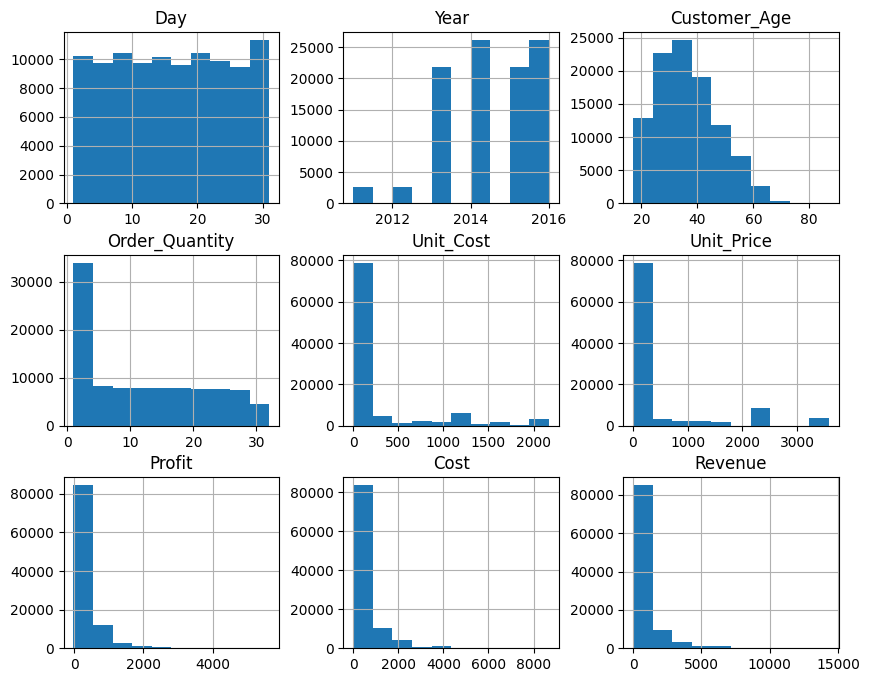

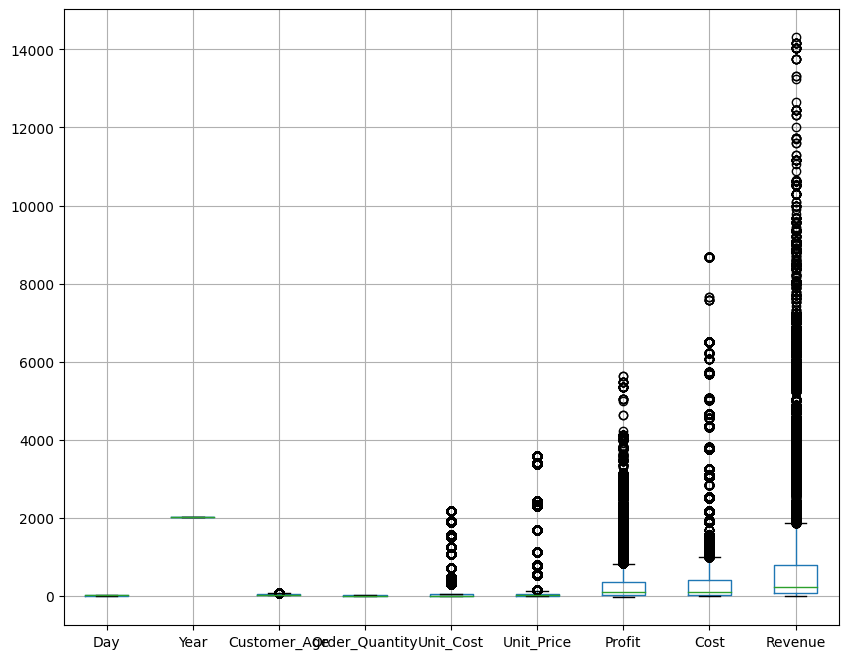

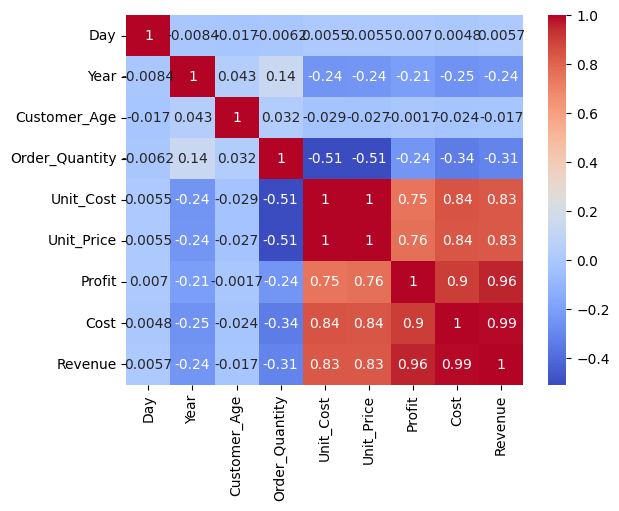

In [7]:
# Summary Statistics
print(data.describe())


# Visualization - Histogram for numerical columns
data.hist(figsize=(10, 8))
plt.show()

# Boxplot for numerical columns
data.boxplot(figsize=(10, 8))
plt.show()


# Correlation Analysis (for numerical columns)
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


**Build a baseline regression model to predict bike sales based on the provided features.**

In [17]:
from sklearn.utils import shuffle

# Shuffling the Dataset
data = shuffle(data, random_state = 42)

#creating 4 divisions
div = int(data.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = data.loc[:3*div+1,:]
test = data.loc[3*div+1:]


In [18]:
# Perform encoding for categorical variables
data_dummies = pd.get_dummies(data, columns = ['Date','Month','Age_Group','Customer_Gender','Country','State',
                                               'Product_Category','Sub_Category','Product'])

In [20]:
# Prepare data - assuming 'Revenue' is the target variable
x = data_dummies.drop('Revenue', axis=1)  # Features
y = data_dummies['Revenue']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print("Train set - Features:", train_x.shape, "Target:", train_y.shape)
print("Test set - Features:", test_x.shape, "Target:", test_y.shape)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(train_x, train_y)

# Make predictions on the test set
predictions = model.predict(test_x)

# Evaluate the model
mse = mean_squared_error(test_y, predictions)
r2 = r2_score(test_y, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared score: {r2}")


Train set - Features: (80832, 2093) Target: (80832,)
Test set - Features: (20209, 2093) Target: (20209,)
Mean Squared Error (MSE): 3.4203040951409812e-06
R-squared score: 0.9999999999979288


**Evaluate the model's performance using appropriate metrics such as MAE, MSE, RMSE, or RMSLE**

In [21]:
# storing simple mean in a new column in the test set as "simple_mean"
test['simple_mean'] = train['Revenue'].mean()

In [23]:
#calculating mean absolute error
simple_mean_error = MAE(test["Revenue"] , test['simple_mean'])
simple_mean_error

803.5371974857671

In [27]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_y, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_y, predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(test_y, predictions, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate Root Mean Squared Logarithmic Error (RMSLE)
# Note: RMSLE works only for positive values, so ensure your target variable (y) is non-negative.
rmsle = mean_squared_log_error(test_y, predictions)
rmsle = (rmsle)**0.5  # Taking square root of MSE equivalent to RMSLE
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")


Mean Absolute Error (MAE): 2.677156491083447e-05
Mean Squared Error (MSE): 3.4203040951409812e-06
Root Mean Squared Error (RMSE): 0.0018494064169730193
Root Mean Squared Logarithmic Error (RMSLE): 1.06265821643081e-06


**Mean Revenue with respect to Product**

In [28]:
#Getting the pivot table
product = pd.pivot_table(train, values='Revenue', index = ['Product'], aggfunc=np.mean)
product

,Revenue
Product,
AWC Logo Cap,125.943775
All-Purpose Bike Stand,781.016393
Bike Wash - Dissolver,115.086420
Fender Set - Mountain,303.956140
HL Mountain Tire,506.671141
...,...
Touring Tire Tube,67.110714
Water Bottle - 30 oz.,70.358702
"Women's Mountain Shorts, L",887.141304


In [29]:
# initializing new column to zero
test['Product_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['Product'].unique():
  # Assign the mean value corresponding to unique entry
  test['Product_mean'][test['Product'] == str(i)] = train['Revenue'][train['Product'] == str(i)].mean()

In [30]:
#calculating mean absolute error
product_error = MAE(test['Revenue'] , test['Product_mean'] )
product_error

326.302856987169